#Введение в глубинное обучение. Полносвязные слои.

In [ ]:
import torch

class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return (
            torch.tensor(self.x[idx, :], dtype=torch.float), 
            torch.tensor(self.y[idx], dtype=torch.float)
            )

In [ ]:
import numpy as np

x = np.random.rand(1000, 5)
y = x[:, 0] + x[:, 1] + x[:, 2] ** 2

In [ ]:
my_dataset = RandomDataset(x, y)
dataloader = torch.utils.data.DataLoader(my_dataset, batch_size=16)

In [ ]:
from torch import nn

model = nn.Sequential()
model.add_module('l1', nn.Linear(5, 10))
model.add_module('l2', nn.ReLU())
model.add_module('l3', nn.Linear(10, 1))

In [ ]:
from torch.utils.data import random_split

train_data, val_data = random_split(my_dataset, [800, 200])

train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=16)
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=16)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.05) 

In [ ]:
import torch.nn.functional as F
from tqdm import tqdm

for epoch in range(5):
  for x_train, y_train in tqdm(train_dataloader):
    y_pred = model(x_train)
    print(y_train)
    loss = F.cross_entropy(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  if epoch % 2 == 0:
    val_loss = []
    val_rmse = []
    with torch.no_grad():
      for x_val, y_val in tqdm(val_dataloader):
        y_pred = model(x_val)
        loss = F.cross_entropy(y_pred, y_val)
        val_loss.append(loss.numpy())
        val_rmse.append(torch.sqrt(torch.mean((y_pred - y_val) ** 2)))

    print(f'Epoch {epoch}, loss {np.mean(val_loss)}, rmse {np.mean(val_rmse)}')

  0%|          | 0/50 [00:00<?, ?it/s]

tensor([2.0322, 1.8368, 0.9251, 0.9252, 1.5375, 0.6691, 1.9257, 1.8663, 1.7774,
        1.2633, 1.8740, 1.1352, 1.8142, 1.4253, 1.2719, 1.8805])


RuntimeError: ignored

In [ ]:
import torch
import math


x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x) + torch.cos(x) ** 2

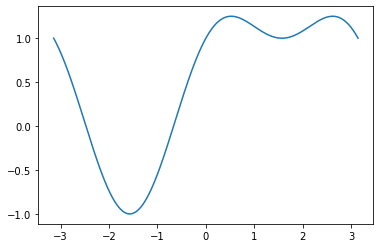

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, y)

In [ ]:
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [ ]:
xx = torch.stack([torch.sin(x), torch.cos(x)], dim=1)

In [ ]:
model = nn.Sequential(
    nn.Linear(2, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Flatten(0, 1)
)

loss_fn = nn.MSELoss(reduction='sum')

learning_rate = 1e-05
for t in range(7500):
  y_pred = model(xx)

  loss = loss_fn(y_pred, y)
  if t % 100 == 99:
    print(t, loss.item())

  model.zero_grad()
  loss.backward()

  with torch.no_grad():
    for param in model.parameters():
      param -= learning_rate * param.grad

linear_layer = model[0]

In [ ]:
y_pred = model(xx)
y_pred.detach().numpy()

array([1.0018517 , 0.998124  , 0.99439096, ..., 1.0092919 , 1.0055743 ,
       1.0018516 ], dtype=float32)

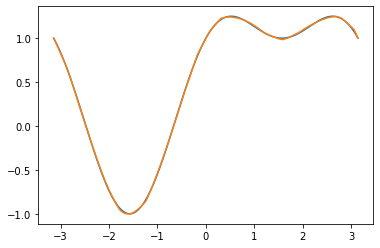

In [ ]:
plt.plot(x, y)
plt.plot(x, y_pred.detach().numpy())

In [ ]:
import torch
import math

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x) - torch.cos(x) + torch.sin(x) * torch.cos(x)

xx = torch.stack([torch.sin(x), torch.cos(x), x], dim=1)

model = torch.nn.Sequential(
    torch.nn.Linear(3, 12),
    torch.nn.ReLU(),
    torch.nn.Linear(12, 6),
    torch.nn.ReLU(),
    torch.nn.Linear(6, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

for t in range(8000):
  y_pred = model(xx)

  loss = loss_fn(y_pred, y)
  if t % 100 == 99:
    print(t, loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

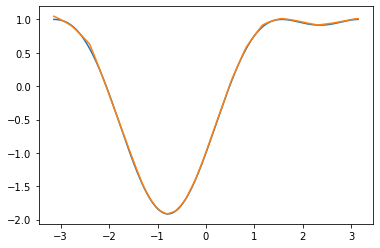

In [ ]:
plt.plot(x, y)
plt.plot(x, model(xx).detach().numpy())

In [ ]:
import torch
import math
import random

class DynamicNet(torch.nn.Module):
  def __init__(self):
    '''
    In the constructor we instantiate four parametrs and assign them as member 
    parametrs
    '''
    super().__init__()
    self.a = torch.nn.Parameter(torch.randn(()))
    self.b = torch.nn.Parameter(torch.randn(()))
    self.c = torch.nn.Parameter(torch.randn(()))
    self.d = torch.nn.Parameter(torch.randn(()))
    self.e = torch.nn.Parameter(torch.randn(()))

  def forward(self, x):
    '''
    In the forward function we accept Tensor of input data and we must return
    a Tensor of output data. We can use Modules definde in the constructor as
    well aebitary operations on Tensor
    '''
    y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
    for exp in range(4, random.randint(4, 6)):
      y = y + self.e * x ** exp

    return y

  def string(self):
    '''
    You can define custom method on PyTorch modules
    '''

    return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3 + {self.e.item()} x^4 + {self.e.item()} x^5'


x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

model = DynamicNet()

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-08, momentum=0.9)

for t in range(30000):
  y_pred = model(x)

  loss = criterion(y_pred, y)
  if t % 2000 == 1999:
    print(t, loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


print(f'Results - {model.string()}')

1999 131.41871643066406
3999 72.45330047607422
5999 40.84015655517578
7999 24.20201301574707
9999 16.82180404663086
11999 13.170308113098145
13999 10.820123672485352
15999 9.864405632019043
17999 9.201902389526367
19999 9.071643829345703
21999 8.717607498168945
23999 8.921647071838379
25999 8.894743919372559
27999 8.911996841430664
29999 8.578646659851074
Results - y = -0.002408730797469616 + 0.8576377034187317 x + -0.00014755995653104037 x^2 + -0.09375102818012238 x^3 + 0.00011444967094575986 x^4 + 0.00011444967094575986 x^5


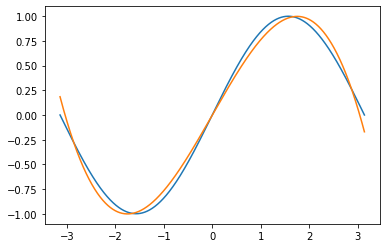

In [ ]:
plt.plot(x, y)
plt.plot(x, model(x).detach().numpy())

#Метод обратного распространения ошибки. Свёртки и свёрточные слои.

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import clear_output
from matplotlib import cm
from tqdm.auto import tqdm

warnings.filterwarnings('ignore')

In [ ]:
!wget https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cnn/screencast_1/butterfly.jpg

--2022-05-23 11:42:17--  https://raw.githubusercontent.com/hushchyn-mikhail/CourseraDL/main/cnn/screencast_1/butterfly.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73801 (72K) [image/jpeg]
Saving to: ‘butterfly.jpg’

butterfly.jpg       100%[===================>]  72.07K  --.-KB/s    in 0.009s  

2022-05-23 11:42:17 (7.99 MB/s) - ‘butterfly.jpg’ saved [73801/73801]



Image format JPEG, shape (640, 427), color RGB


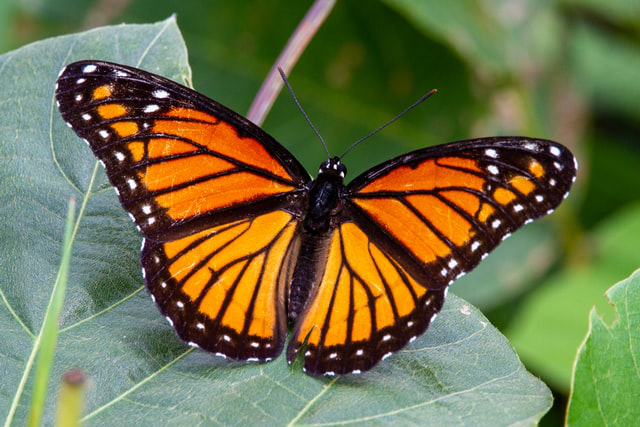

In [ ]:
from PIL import Image
img = Image.open('butterfly.jpg')

print(f'Image format {img.format}, shape {img.size}, color {img.mode}')
img

Imagew matrix shape : (427, 640, 3)


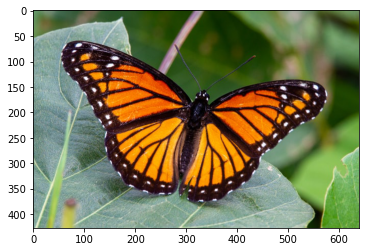

In [ ]:
img_matrix = np.array(img)

print(f'Imagew matrix shape : {img_matrix.shape}')

plt.imshow(img_matrix)
plt.show()

In [ ]:
import torch
from torch.nn.functional import conv2d

img_tensor = torch.tensor([img_matrix], dtype=torch.float)
img_tensor.size()

torch.Size([1, 427, 640, 3])

In [ ]:
img_tensor = img_tensor.permute(0, 3, 1, 2)
img_tensor.size() 
#число изображений \ число каналов \ высота \ ширина

torch.Size([1, 3, 427, 640])

In [ ]:
sobel_hor = [[-1, -2, -1],
             [0, 0, 0],
             [1, 2, 1]]

# одна матрица на каждый канал картинки
kernel = [[sobel_hor, sobel_hor, sobel_hor]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size()

torch.Size([1, 3, 3, 3])

In [ ]:
img_conv_hor = conv2d(img_tensor, kernel)
img_conv_hor = img_conv_hor.permute(0, 2, 3, 1)
img_conv_hor.size()

torch.Size([1, 425, 638, 1])

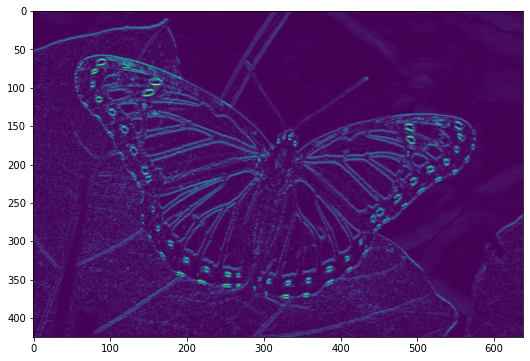

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(torch.abs(img_conv_hor[0, :, :, 0]))
plt.show()

In [ ]:
sobel_ver = [[-1, 0, 1], 
             [-2, 0, 2], 
             [-1, 0, 1]]

kernel  = [[sobel_ver, sobel_ver, sobel_ver]]
kernel = torch.tensor(kernel, dtype=torch.float)
kernel.size()

torch.Size([1, 3, 3, 3])

In [ ]:
img_conv_ver = conv2d(img_tensor, kernel)

img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)
img_conv_ver.size()

torch.Size([1, 425, 638, 1])

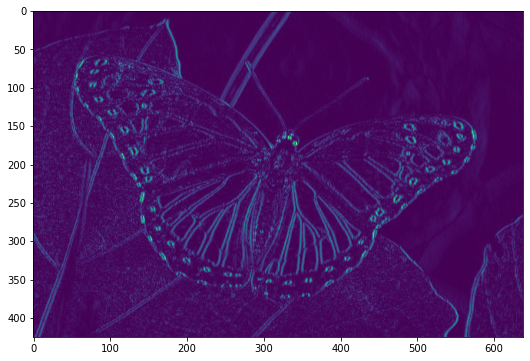

In [ ]:
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_ver[0, :, :, 0]))
plt.show()

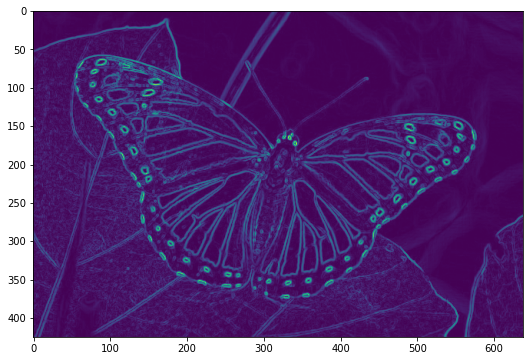

In [ ]:
img_conv = torch.sqrt(img_conv_ver**2 + img_conv_hor**2)

plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(img_conv[0, :, :, 0])
plt.show()

Задание 1

По аналогии с примером выше, сверните изображение со случайным ядром такого же размера.

In [ ]:
kernel

tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]],

         [[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]])

In [ ]:
kernel * torch.tensor([0.7, 1, 0.1])

tensor([[[[-0.7000,  0.0000,  0.1000],
          [-1.4000,  0.0000,  0.2000],
          [-0.7000,  0.0000,  0.1000]],

         [[-0.7000,  0.0000,  0.1000],
          [-1.4000,  0.0000,  0.2000],
          [-0.7000,  0.0000,  0.1000]],

         [[-0.7000,  0.0000,  0.1000],
          [-1.4000,  0.0000,  0.2000],
          [-0.7000,  0.0000,  0.1000]]]])

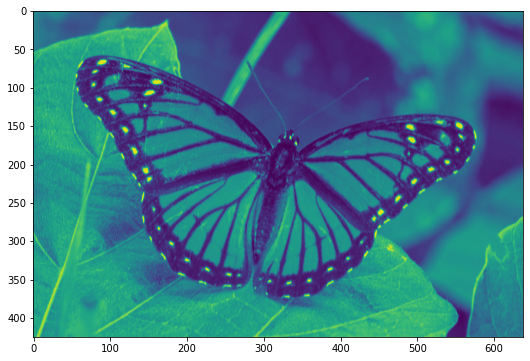

In [ ]:
#kernel = torch.rand_like(kernel) * torch.tensor([0, 9, 0])
kernel = kernel * torch.tensor([4, 1, 0.1])
# свертка изображения
img_conv_ver = conv2d(img_tensor, kernel)
img_conv_ver = img_conv_ver.permute(0, 2, 3, 1)

# рисуем результат
plt.figure(figsize=(1.5 * 7, 1.5 * 4))
plt.imshow(torch.abs(img_conv_ver[0, :, :, 0]))
plt.show()

## Полносвязная нейронная сеть

In [ ]:
import torch
import torch.nn.functional as F
import torchvision
from torch import nn

In [ ]:
transform = torchvision.transforms.Compose(
    [
     torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.1307,), (0.3081,))
    ]
)

mnist_train = torchvision.datasets.MNIST(
    './mnist/',
    train=True,
    download=True,
    transform=transform
)

mnist_val = torchvision.datasets.MNIST(
    './mnist/',
    train=False,
    download=True,
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, 
                                               shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64,
                                              shuffle=True)

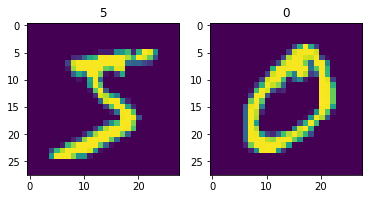

In [ ]:
for i in [0, 1]:
  plt.subplot(1, 2, i + 1)
  plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
  plt.title(str(mnist_train[i][1]))
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-02)

In [ ]:
def train(model, optimizer, n_epochs=5):
  for epoch in range(n_epochs):
    for x_train, y_train in tqdm(train_dataloader):
      y_pred = model(x_train)
      loss = F.cross_entropy(y_pred, y_train)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    if epoch % 2 == 0:
      val_loss = []
      val_accuracy = []

      with torch.no_grad():
        for x_val, y_val in tqdm(val_dataloader):
          y_pred = model(x_val)
          loss = F.cross_entropy(y_pred, y_val)
          val_loss.append(loss.numpy())
          val_accuracy.extend((torch.argmax(y_pred, dim=1) == y_val).numpy().tolist())

        print(f'Epoch {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}')

In [ ]:
train(model, optimizer)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 0, loss: 0.32314518094062805, accuracy: 0.9109


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2, loss: 0.22682204842567444, accuracy: 0.9349


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4, loss: 0.18042534589767456, accuracy: 0.9488


In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4), #уменьшение картинки в 4 раза по каждой стороне
    nn.Flatten(), #превращает картинку 6 на 6 на 10 в вектор размером 360
    nn.Linear(6*6*10, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-02)

In [ ]:
train(model, optimizer)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 0, loss: 0.19798710942268372, accuracy: 0.9415


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2, loss: 0.10133284330368042, accuracy: 0.9703


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4, loss: 0.0740220695734024, accuracy: 0.9767


In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(4*4*20, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-02)

In [ ]:
train(model, optimizer)

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 0, loss: 0.2106218785047531, accuracy: 0.9372


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2, loss: 0.0798957422375679, accuracy: 0.9772


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4, loss: 0.061473652720451355, accuracy: 0.9814


#Классификация изображений
*https://github.com/Kirili4ik/iad-deep-learning/blob/master/2021/seminars/sem03/sem03_solved_with_comments.ipynb*

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision

from IPython.display import clear_output
from torch import nn, optim
from torchvision import transforms
from tqdm.auto import tqdm, trange

warnings.filterwarnings('ignore')

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

##Обучаем сверточную сеть для задачи классификации изображений

In [ ]:
transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # средние и дисперсии по каналам
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root='./cifar',
    train=True,
    download=True,
    transform=transform
)
valset = torchvision.datasets.CIFAR10(
    root='./cifar',
    train=False,
    download=True,
    transform=transform
)

train_dataloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=16, 
    shuffle=True,
    num_workers=1
)
val_dataloader = torch.utils.data.DataLoader(
    valset,
    batch_size=16, 
    shuffle=False,
    num_workers=1
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def matplotlib_imshow(img, one_channel=False):
  if one_channel:
    img = img.mean(dim=0)
  img = img / 2 + 0.5
  npimg = img.numpy()

  if one_channel:
    plt.imshow(npimg, cmap='Greys')
  else:
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

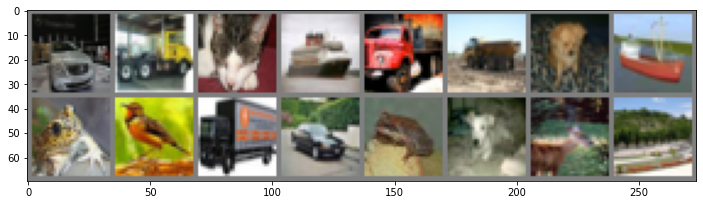

In [ ]:
images, labels = next(iter(train_dataloader))

plt.figure(figsize=(12, 12))

img_grid = torchvision.utils.make_grid(images)

matplotlib_imshow(img_grid, one_channel=False)

In [ ]:
def plot_history(train_history, val_history, title='loss'):
  plt.figure()
  plt.title('{}'.format(title))
  plt.plot(train_history, label='train', zorder=1)

  points = np.array(val_history)
  steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]

  plt.scatter(steps, val_history, marker='+', s=180, c='orange', label='val', zorder=2)
  plt.xlabel('train steps')

  plt.legend(loc='best')
  plt.grid()

  plt.show()

In [ ]:
class ModelBaseline(nn.Module):
  def __init__(self):
    super(ModelBaseline, self).__init__()
    self.conv1   = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), 
                           padding=3//2)
    self.conv2   = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(5, 5), 
                           padding=5//2)
    self.relu    = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) # то же самое что и (2, 2)
    self.linear1 = nn.Linear(32 * 32 * 16 // 4, 128) # картинка 32 на 32 с 16 и maxpoling с шагом(stride) 2
    self.linear2 = nn.Linear(128, 10)
    self.flatten = nn.Flatten()

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    flattend = self.flatten(self.maxpool(x))
    x = self.relu(self.linear1(flattend))
    
    return self.linear2(x)

In [ ]:
model_baseline = ModelBaseline()
model_baseline.to(device)

ModelBaseline(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=4096, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
  (flatten): Flatten(start_dim=1, end_dim=-1)
)

In [ ]:
def train(model, criterion, optimizer, train_dataloader, val_dataloader, n_epochs):
  train_loss_log = []
  train_acc_log = []
  val_loss_log = []
  val_acc_log = []

  for epoch in range(n_epochs):
    model.train() # переводим модель в режим обучения
    train_loss, train_size, train_acc = 0., 0, 0.

    for imgs, labels in tqdm(train_dataloader):
      imgs, labels = imgs.to(device), labels.to(device)

      optimizer.zero_grad()
      y_pred = model(imgs)
      loss = criterion(y_pred, labels)
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
      train_size += y_pred.size(0)
      train_loss_log.append(loss.data / y_pred.size(0))

      _, pred_classes = torch.max(y_pred, 1)
      train_acc += (pred_classes == labels).sum().item()
      train_acc_log.append(np.mean((pred_classes == labels).cpu().numpy()))

    val_loss, val_size, val_acc = 0., 0, 0.
    model.eval() #переводим модель в валидационный режим
    with torch.no_grad():
      for imgs, labels in tqdm(val_dataloader):
        imgs, labels = imgs.to(device), labels.to(device)
        pred = model(imgs)
        loss = criterion(pred, labels)
        val_loss += loss.item()
        val_size += pred.size(0)

        _, pred_classes = torch.max(pred, 1)
        val_acc += (pred_classes == labels).sum().item()
    val_loss_log.append(val_loss / val_size)
    val_acc_log.append(val_acc / val_size)

    #clear_output()
    #plot_history(train_loss_log, val_loss_log)
    #plot_history(train_acc_log, val_acc_log)

    print('Train loss: ', train_loss / train_size)
    print('Train accuracy: ', train_acc / train_size)
    print('Val loss: ', val_loss / val_size)
    print('Val accuracy: ', val_acc / val_size)

###Важная штука, зафиксировать сид, чтобы можно пототм ыбло эксперемент повторить

In [ ]:
def set_seed(seed):
  torch.backends.cudnn.deterministic = True
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  #random.seed(seed)
  #np.random.seed(seed)

set_seed(42)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(params=model_baseline.parameters(), lr=1e-03, momentum=0.9)

In [ ]:
train(model_baseline, criterion, optimizer, train_dataloader, val_dataloader, 
      n_epochs=10)

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.09280557124972344
Train accuracy:  0.46548
Val loss:  0.0766027987152338
Val accuracy:  0.5657


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.06900125189244748
Train accuracy:  0.61258
Val loss:  0.07195965365767479
Val accuracy:  0.5979


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.0577802173680067
Train accuracy:  0.67366
Val loss:  0.06999901790320873
Val accuracy:  0.627


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.049040354403704405
Train accuracy:  0.7267
Val loss:  0.07695239973664283
Val accuracy:  0.6207


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.041700997078046205
Train accuracy:  0.76996
Val loss:  0.08525347400605679
Val accuracy:  0.6088


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.035886926761828364
Train accuracy:  0.80484
Val loss:  0.09048147662580014
Val accuracy:  0.6235


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


  0%|          | 0/625 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Train loss:  0.03154191189678386
Train accuracy:  0.83122
Val loss:  0.0933355884745717
Val accuracy:  0.6118


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>


  0%|          | 0/3125 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.030810885339155793
Train accuracy:  0.84202
Val loss:  0.11353108459413051
Val accuracy:  0.5961


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.029037134993430226
Train accuracy:  0.85356
Val loss:  0.13248673968166114
Val accuracy:  0.5842


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/625 [00:00<?, ?it/s]

Train loss:  0.028648080120589583
Train accuracy:  0.85866
Val loss:  0.14955972053408623
Val accuracy:  0.5702


##Аугументация


In [ ]:
import PIL

transform = transforms.Compose(
    [
     transforms.ColorJitter(hue=.05, saturation=.05),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./cifar', train=True,
                                        download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=16, 
                                               shuffle=True, num_workers=1)
tesetset = torchvision.datasets.CIFAR10(root='./cifar', train=False,
                                        download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(trainset, batch_size=16, 
                                               shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


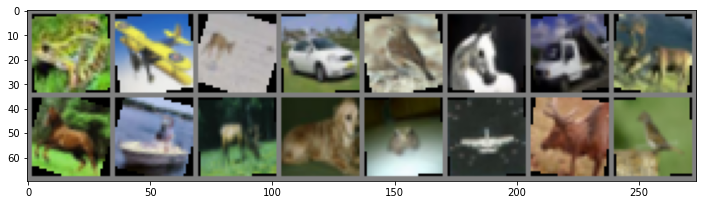

In [ ]:
plt.figure(figsize=(12, 12))

images, labels = next(iter(train_dataloader))
img_grid = torchvision.utils.make_grid(images)

matplotlib_imshow(img_grid)

In [ ]:
model_base = ModelBaseline()
model_base.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_base.parameters(), lr=1e-03, momentum=0.95)

train(model_base, criterion, optimizer, train_dataloader, test_dataloader, 10)

##Как улучшить качество модели

Особенность VGG блока заключается в том, что повышение качество работы сети достигается увеличением числа последовательных блоков. При этом число фильтров в каждоми новаом блоке в два раза болше чем в предыдущем. 


###Dropout

Если сеть имеет сложную арихитектуру, то возможно переобучении - процесс в которм модель слишком сильно подстаариввается под тренироваочную выбооку и потом дает заниженно качестов на тестовой. Для борьбы с этим будем использовать dropout.

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, 3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 16, 3, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Conv2d(16, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Conv2d(32, 64, 3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Flatten(),
    nn.Linear(64 * 4 * 4, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 10),
    nn.Softmax()
)

In [ ]:
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-03, momentum=0.9)

In [ ]:
train(model, criterion, optimizer, train_dataloader, test_dataloader, 50)

  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Train loss:  0.1362495936226845
Train accuracy:  0.29662
Val loss:  0.13103552228689194
Val accuracy:  0.38184


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.12860471498012543
Train accuracy:  0.41436
Val loss:  0.12447556842803956
Val accuracy:  0.4773


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.1255692369413376
Train accuracy:  0.46066
Val loss:  0.12224391046762466
Val accuracy:  0.51338


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.12352406351566314
Train accuracy:  0.49248
Val loss:  0.11988298717975616
Val accuracy:  0.55322


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.1218146078300476
Train accuracy:  0.51864
Val loss:  0.11770865588188172
Val accuracy:  0.58468


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.12048259406089783
Train accuracy:  0.53854
Val loss:  0.11643250217199326
Val accuracy:  0.60306


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.11944510208129883
Train accuracy:  0.55544
Val loss:  0.11553406356811523
Val accuracy:  0.61758


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11858879673957824
Train accuracy:  0.56796
Val loss:  0.11448357399463653
Val accuracy:  0.63322


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11782738930225373
Train accuracy:  0.58108
Val loss:  0.11447881869792938
Val accuracy:  0.6323


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.11733481959819794
Train accuracy:  0.58842
Val loss:  0.11367896735429764
Val accuracy:  0.64472


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11680761434555054
Train accuracy:  0.59574
Val loss:  0.1127267014336586
Val accuracy:  0.6602


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11634573982000351
Train accuracy:  0.60222
Val loss:  0.11228358982086181
Val accuracy:  0.6677


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
AssertionError: can only test a child process
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11596246789693833
Train accuracy:  0.60848
Val loss:  0.11231489287614822
Val accuracy:  0.6655


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.1156604844045639
Train accuracy:  0.6126
Val loss:  0.11160859350442887
Val accuracy:  0.67768


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.11553223670721054
Train accuracy:  0.61496
Val loss:  0.11192515044927596
Val accuracy:  0.67276


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11515298565149307
Train accuracy:  0.6186
Val loss:  0.1114746081519127
Val accuracy:  0.67844


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.1149350089931488
Train accuracy:  0.62424
Val loss:  0.11145560132741929
Val accuracy:  0.67898


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.11459457927465438
Train accuracy:  0.62966
Val loss:  0.11096421044826507
Val accuracy:  0.68796


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11438356084108353
Train accuracy:  0.63314
Val loss:  0.11064570462942123
Val accuracy:  0.69274


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11416655302047729
Train accuracy:  0.63652
Val loss:  0.10994626672267914
Val accuracy:  0.7037


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
    assert self._parent_pid == os.getpid(), 'can only test a child process'
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
Traceback (most recent call last):
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    if w.is_alive():
    self._shutdown_workers()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    assert self._parent_pid == os.getpid(), 'can only test a child process'
    if w.is_a

Train loss:  0.11406472672700882
Train accuracy:  0.6367
Val loss:  0.11035136277675629
Val accuracy:  0.69476


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11338813956260681
Train accuracy:  0.64918
Val loss:  0.10899563726902008
Val accuracy:  0.72044


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.1126074015378952
Train accuracy:  0.66476
Val loss:  0.10830397902965545
Val accuracy:  0.73186


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.11220772911071777
Train accuracy:  0.66996
Val loss:  0.10798523508310318
Val accuracy:  0.7361


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.1119558266234398
Train accuracy:  0.67376
Val loss:  0.1078248922920227
Val accuracy:  0.73956


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11173012653827667
Train accuracy:  0.67718
Val loss:  0.10737699967861175
Val accuracy:  0.74518


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.11141027326822281
Train accuracy:  0.6817
Val loss:  0.10719132549285888
Val accuracy:  0.7494


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.1112789903664589
Train accuracy:  0.68404
Val loss:  0.10720092371463776
Val accuracy:  0.74964


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11111832524776459
Train accuracy:  0.68526
Val loss:  0.10695837788581848
Val accuracy:  0.75256


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.1109218479180336
Train accuracy:  0.6889
Val loss:  0.10679380834817886
Val accuracy:  0.75532


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11078719690322876
Train accuracy:  0.6906
Val loss:  0.10659381886959075
Val accuracy:  0.75776


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11062073882341385
Train accuracy:  0.6934
Val loss:  0.1061419731593132
Val accuracy:  0.7662


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.11048964195489884
Train accuracy:  0.69532
Val loss:  0.10627293400287628
Val accuracy:  0.76266


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/d

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11036661194562912
Train accuracy:  0.6977
Val loss:  0.10599200917005538
Val accuracy:  0.76818


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.11034473378419876
Train accuracy:  0.69732
Val loss:  0.1060467679977417
Val accuracy:  0.76656


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.1102512485575676
Train accuracy:  0.69864
Val loss:  0.10551178458690644
Val accuracy:  0.77482


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10997713168382645
Train accuracy:  0.7035
Val loss:  0.1059928596997261
Val accuracy:  0.76812


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10998782341480255
Train accuracy:  0.70446
Val loss:  0.10531456912279129
Val accuracy:  0.77872


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.10972728520870209
Train accuracy:  0.70754
Val loss:  0.10537273499250412
Val accuracy:  0.77698


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10971095370531082
Train accuracy:  0.7079
Val loss:  0.10579499811410904
Val accuracy:  0.77004


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10971818183422088
Train accuracy:  0.707
Val loss:  0.10535492287635803
Val accuracy:  0.77742


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Train loss:  0.10965035773992539
Train accuracy:  0.70788
Val loss:  0.10544434763669967
Val accuracy:  0.77568


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10943977191209793
Train accuracy:  0.7119
Val loss:  0.10509189026594162
Val accuracy:  0.78262


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10936377895355225
Train accuracy:  0.7126
Val loss:  0.10512363288879395
Val accuracy:  0.78102


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Train loss:  0.10933202950000763
Train accuracy:  0.71196
Val loss:  0.10470599625110626
Val accuracy:  0.78906


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10922249106645585
Train accuracy:  0.71538
Val loss:  0.10490503480434418
Val accuracy:  0.7852


  0%|          | 0/3125 [00:00<?, ?it/s]

  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10914106756210327
Train accuracy:  0.71608
Val loss:  0.10499028796434402
Val accuracy:  0.78292


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


  0%|          | 0/3125 [00:00<?, ?it/s]

Train loss:  0.10894546166181564
Train accuracy:  0.7184
Val loss:  0.1049568226313591
Val accuracy:  0.783


  0%|          | 0/3125 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f4cf1d94a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

#Методы оптимизации

In [ ]:
import math
import os
import random
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from tqdm.auto import tqdm

warnings.filterwarnings('ignore')

Большинство методов машинного обучения сводятся к простому поиску парамтеров, который бы минимизировал ошибку на тренировочной выборке.
$$
\min_{\theta} \sum_{x \in X_{test}} L(p_{\theta}(x), y)
$$

Здесь:

- $L$ - некоторый лосс
- $p_{θ}$ - нейронная сеть с параметрами $\theta$
- X - данные для обучения
- y - ответы

Напишем алгоритм для поиска минимума некоторой функции

$$
f(x) = x^3 + 2x^2 + 2
$$

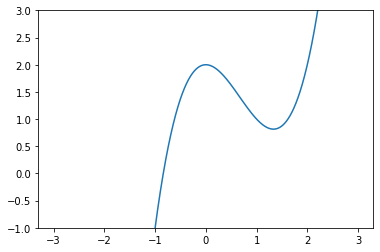

In [ ]:
# Наша функция f(x)
func = lambda x: x ** 3 - 2 * x ** 2 + 2

# Производная функции f(x)
d_func = lambda x: 3 * x ** 2 - 4 * x

# Сделаем массив из 1000 элементов от -3 до 3
x = np.linspace(-3, 3, 1000)

# Определим границы по y для графика
plt.ylim([-1, 3])
plt.plot(x, func(x))
plt.show()

Определим функцию для оптимизации f(x), которая должна принимать на вход learning rate, максимальное количество итераций

In [ ]:
def find_minimum_first_order(learning_rate=0.01, eps=1e-04, max_iterations=1000, 
                             anneal_learning_rate=None):
  i = 0
  x_old, x_new = 0, 2
  x_list, y_list = [x_old], [func(x_old)]
  if not anneal_learning_rate:
    anneal_learning_rate = lambda lr, step: lr 

  while abs(x_new - x_old) > eps and i < max_iterations:
    learning_rate = anneal_learning_rate(learning_rate, step=i)

    x_old = x_new
    x_new = x_old - learning_rate * d_func(x_old)

    x_list.append(x_new)
    y_list.append(func(x_new))
    
    i+= 1

  print('Найденный локальный минимум : ', x_new)
  print('Количество шагов : ', len(x_list))

  plt.figure(figsize=[6, 4])
  plt.ylim([-3, 8])
  plt.scatter(x_list, y_list, c='r', edgecolors='k')
  plt.plot(x_list, y_list, c='r')
  plt.plot(x, func(x), c='b')
  plt.title('Descent trajektory')
  plt.show()

Найденный локальный минимум :  1.3577577123861129
Количество шагов :  729


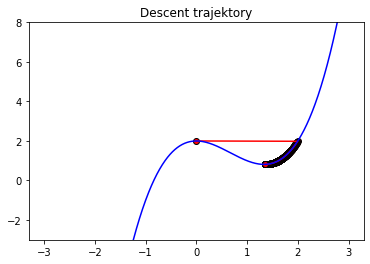

Найденный локальный минимум :  1.3356881625009205
Количество шагов :  129


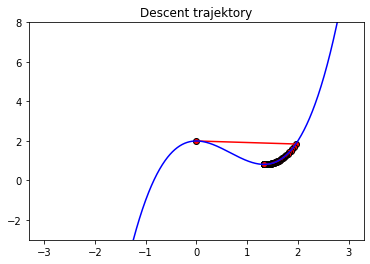

Найденный локальный минимум :  1.3334253508453249
Количество шагов :  17


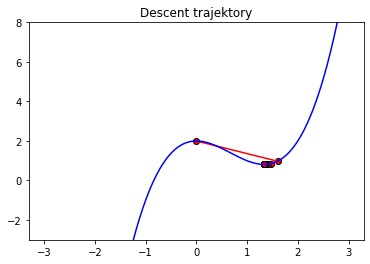

Найденный локальный минимум :  1.3333548979344512
Количество шагов :  12


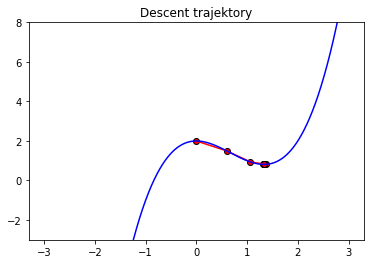

In [ ]:
find_minimum_first_order(1e-03)
find_minimum_first_order(1e-02)
find_minimum_first_order(1e-01)
find_minimum_first_order(0.35)

Найденный локальный минимум :  1.294744839667743
Количество шагов :  7


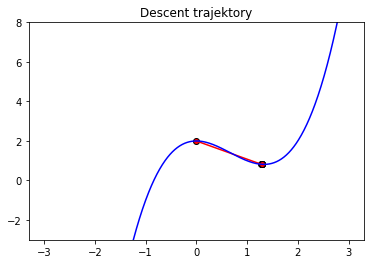

In [ ]:
find_minimum_first_order(0.6, anneal_learning_rate=lambda lr, step: 0.3 * lr)

## Описание алгоритмов градиентного спуска

# Описание алгоритмов градиентного спуска

### SGD
SGD - этот же самый gradient descent, что мы рассматривали ранее, вот только подсчёт градиентов производится не по всему множеству данных, а по отдельно взятому сэмплу. Очевидно, такая оптимизация будет очень шумной, что усложнит обучение модели. Поэтому обычно используют MiniBatch-SGD, где вместо одного сэмпла мы берём K. У такого подхода есть несколько плюсов:
* ниже variance в сравнении с обычной SGD, что приводит к более стабильному процессу оптимизации
* хорошо работает с DL библиотеками, так как теперь мы работаем с матрицами

$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
w &=& w - \eta \times g
\end{eqnarray}
$$

### SGD with Momentum

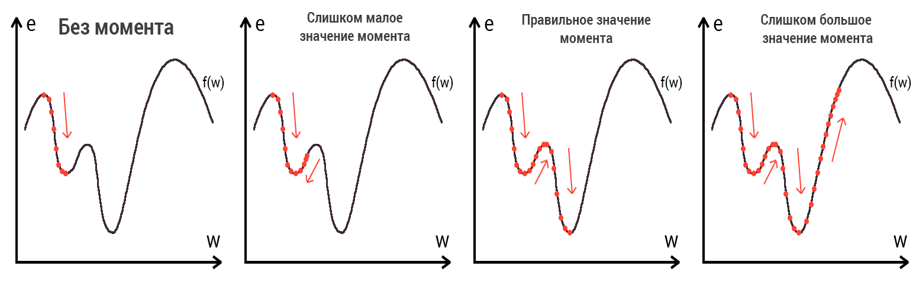

Попытаемся добавить SGD эффект инерции. Теперь, вместо того чтобы двигаться строго в направлении градиента в каждой точке, мы стараемся продолжить движение в том же направлении, в котором двигались ранее. То есть у нашей точки, которая спускается по многомерной поверхности, появляется импульс (momentum), который контролируется при помощи параметра $\alpha$. Он определяет какую часть прошлого градиента мы хотим использовать на текущем шаге.
$$
\begin{eqnarray}
g_{t} &=& \alpha g_{t-1} + \eta \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
w &=& w - \eta \times g
\end{eqnarray}
$$

## Адаптивные варианты градиентного спуска
Во всех предыдущих алгоритмах у нас был фиксированный learning rate. Начиная с Adagrad у нас будет идти алгоритмы, которые подстраивают learning rate в зависимости от обучения. Они называются адаптивными вариантами градиентного спуска.

Адаптивные варианты градиентного спуска подстраивает темп обучения таким образом, чтобы делать большие или маленькие обновления отдельных параметров. Например, может так сложиться, что некоторые веса близки к своим локальным минимумам, тогда по этим координатам нужно двигаться медленнее, а другие веса ещё только в середине, значит их можно менять гораздо быстрее. Подобные методы часты приводят к более обоснованной модели и сходятся гораздо быстрее.

### Adagrad
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
s &=& s + diag(gg^{T}) \\
w &=& w - \frac{\eta}{\sqrt{s+eps}} \odot g
\end{eqnarray}
$$
Теперь нам не нужно сильно волноваться о правильном подборе $\eta$, так как $s$ контролирует скорость обучения для каждого параметра.

### RMSprop
У Adagrad есть сильный минус. $s$ - всегда положительна и постоянно растёт во время обучения, что приводит к ситуации, когда у нас learning rate становится слишком маленький, и мы перестаём учиться. RMSprop исправляет эту проблему при помощи экспоненциального сглаживания
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
s &=& \rho s + (1 - \rho) diag(gg^{T}) \\
w &=& w - \frac{\eta}{\sqrt{s+eps}} \odot g
\end{eqnarray}
$$

### Adam
Добавим не только моменты второго порядка, но и первого при обновлении параметров
$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
m &=& \beta_1 m + (1 - \beta_1) g \\
v &=& \beta_2 v + (1 - \beta_2) diag(gg^{T}) \\
\hat{m} &=& \frac{m}{1 - \beta_1^{t}} \\
\hat{v} &=& \frac{v}{1 - \beta_2^{t}} \\
w &=& w - \frac{\eta}{\sqrt{\hat{v} + \epsilon}} \odot \hat{m}
\end{eqnarray}
$$

### Схема
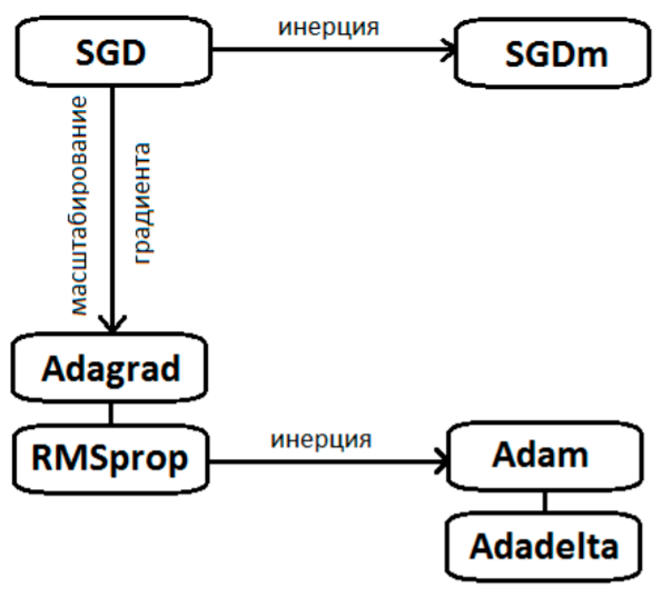

In [ ]:
[elem for elem in dir(torch.optim) if not elem.startswith('_')]

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 'lr_scheduler',
 'swa_utils']

Основные функции PyTorch Optimizer:
* __step__ - обновление весов модели
* __zero_grad__ - занулить веса модели (по умолчанию градиенты в PyTorch аккумулируются) ~ `for each param in params: param.grad = None`
* __state_dict__ - получить текущее состояние Optimizer. Для адаптивных методов тут будут храниться аккумулированные квадраты градиентов

## Как сделать instance PyTorch Optimizer?
Достаточно передать параметры модели (их можно получить при помощи функции `parameters()`) и гипер-параметоры для метода оптимизации.

Пример:

In [ ]:
?torch.optim.SGD

In [ ]:
model = torch.nn.Linear(1, 1)
list(model.parameters()), torch.optim.SGD(model.parameters(), lr=0.01)

([Parameter containing:
  tensor([[0.9032]], requires_grad=True), Parameter containing:
  tensor([-0.1668], requires_grad=True)], SGD (
 Parameter Group 0
     dampening: 0
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [ ]:
# Задчадим PyTorch модули в качеств словаря
model = torch.nn.ModuleDict({
    'linear_1' : torch.nn.Linear(1, 1),
    'linear_2' : torch.nn.Linear(2, 2)
})
torch.optim.SGD([
                 {'params' : model['linear_1'].parameters(), 'lr' : 0.3},
                 {'params' : model['linear_2'].parameters()}
], lr=0.5)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.3
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    lr: 0.5
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

##Делаем свой Optimizer

Для того чтобы сделать свой Optimizer не нужно писать совю импле ентаицю каждой итзх основных функицй. Достаточно переопределить только одну из них step

In [ ]:
from sklearn.datasets import make_regression

def seed_everything(seed):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str('seed')

  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True

X, y = map(
    lambda x: torch.from_numpy(x).float(),
    make_regression(n_samples=200, n_features=2)
)

def get_model():
  seed_everything(12)

  return torch.nn.Sequential(
      torch.nn.Linear(2, 10),
      torch.nn.Linear(10, 1)
  )

In [ ]:
from torch.optim import Optimizer

class InClassOptimizer(Optimizer):
  def step(self):
    with torch.no_grad():
      for group in self.param_groups:
        self._group_step(group)
  
  def _group_step(self, group):
    """
      Private helper function to perform
      single optimization step on model parameters.
    """
    raise NotImplementedError()


In [ ]:
class Adagrad(InClassOptimizer):
  def __init__(self, params, lr=1e-03, eps=1e-13):
    defaults = dict(lr=lr, eps=eps)
    super().__init__(params, defaults)

  def _group_step(self, group):
    ''' 
    Каждая группа содержит информацию о значениях, полученных
    при инициализации, и параметрах модели для обновления
    '''
    lr = group['lr']
    eps = group['eps']

    for param in filter(lambda x: x.grad is not None, group['params']):
      self._init_adagrad_buffer(param)
      d_param = param.grad

      buffer = self._get_adagrad_buffer(param)
      buffer.add_(d_param ** 2)

      d_param /= torch.sqrt(buffer + eps)

      param.add_(d_param, alpha=-lr)

  def _get_adagrad_buffer(self, param):
    '''
    Получает накопленные градиенты для SGD
    '''

    param_state = self.state[param]

    return param_state['adagrad_buffer']

  def _init_adagrad_buffer(self, param):
    '''
    Инициализирует накопленные градиенты для SGD
    '''
    param_state = self.state[param]

    if 'adagrad_buffer' not in param_state:
      param_state['adagrad_buffer'] = torch.zeros_like(param) 

In [ ]:
def check_optimizer(model, optim, n_iter):
  loss = torch.nn.MSELoss()

  for i in range(n_iter):
    output = loss(model(X), y.unsqueeze(-1))
    output.backward()

    optim.step()
    optim.zero_grad()

    if i % 100 == 0:
      print(f'Iter {i} - loss {output.item()}')

In [ ]:
model = get_model()
optim = Adagrad(model.parameters(), lr=1e-03)
check_optimizer(model, optim, n_iter=1000)

Iter 0 - loss 11973.5947265625
Iter 100 - loss 11949.724609375
Iter 200 - loss 11938.669921875
Iter 300 - loss 11929.9853515625
Iter 400 - loss 11922.5234375
Iter 500 - loss 11915.8427734375
Iter 600 - loss 11909.7138671875
Iter 700 - loss 11904.0009765625
Iter 800 - loss 11898.6171875
Iter 900 - loss 11893.50390625


In [ ]:
model = get_model()
optim = Adagrad(model.parameters(), lr=1e-01)
check_optimizer(model, optim, n_iter=1000)

Iter 0 - loss 11973.5947265625
Iter 100 - loss 1328.8375244140625
Iter 200 - loss 108.41777038574219
Iter 300 - loss 10.197124481201172
Iter 400 - loss 0.9410713315010071
Iter 500 - loss 0.08487846702337265
Iter 600 - loss 0.007586269173771143
Iter 700 - loss 0.0006760518299415708
Iter 800 - loss 6.0147387557663023e-05
Iter 900 - loss 5.397152108344017e-06


Короче, Adagrad адаптивный градиентный спуск, но как видно из тестов забивать на начальный learning rate совсем не стоит...... :^_^:

##Сравнение методов оптимизации

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

fashion_mnist_train = torchvision.datasets.FashionMNIST(
    './data',
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
train_dataloader = DataLoader(
    fashion_mnist_train,
    batch_size=128,
    shuffle=True,
    num_workers=2
)

fashion_mnist_val = torchvision.datasets.FashionMNIST(
    './data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
val_dataloader = DataLoader(
    fashion_mnist_val,
    batch_size=128,
    num_workers=2
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
from collections import defaultdict

idx_to_labels = defaultdict(lambda: None, {
    0: 'T-shit/Top',
    1: 'Traser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneakers',
    8: 'Bag',
    9: 'Ankle Boot'
})

In [ ]:
class Accuracy:
  def __init__(self):
    self._all_predicitions = torch.LongTensor()
    self._all_labels       = torch.LongTensor()

  def __call__(self, predicitons, labels):
    self._all_predicitions = torch.cat([
        self._all_predicitions,
        predicitons
    ], dim=0)
    self._all_labels = torch.cat([
        self._all_labels, 
        labels  
    ], dim=0)

  def get_metric(self, reset=False):
    correct  = (self._all_predicitions == self._all_labels).long()
    accuracy = correct.sum().float() / self._all_labels.size()
    if reset:
      self.reset()

  def reset(self):
    self._all_predicitions = torch.LongTensor()
    self._all_labels       = torch.LongTensor()

In [ ]:
class SimpleNetEncoder(torch.nn.Module):
  def __init__(self, dropout=0.4):
    super().__init__()

    self.batch_norm = torch.nn.BatchNorm2d(num_features=1)
    self.conv1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3),
        torch.nn.ReLU(),
        torch.nn.MaxPoll2d(kerenl=(2, 2)),
    )
    self.conv2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
        torch.nn.ReLU(),
        torch.nn.MaxPoll2d(kerenl=(2, 2)),
    )
    self.flatten = torch.nn.Flatten()
    self.relu = torch.nn.ReLU()
    self.linear1 = torch.nn.Linear(in_features=64, out_features=128)
    self.linear2 = torch.nn.Linear(in_features=128, out_features=64)
    self.out = torch.nn.Linear(in_features=64, out_features=10)
    self.dropout = torch.nn.Dropout(dropout)

  def forward(self, x):
    x = self.batch_norm(x)
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.flatten(x)
    x = self.relu(self.linear1(x))
    x = self.dropout(x)
    x = self.relu(self.linear2(x))

    return self.output(x)
